In [1]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd

%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
import seaborn as sns
import os
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro 
#to en otra carpeta
sns.set_theme()

$$Z_n=\frac{\bar{X}_n-\mu}{\sigma/\sqrt{n}}$$

In [42]:
def central(s,k):
    new_s=[]
    for i in range(0,len(s)):
        new_s.append(np.mean(np.random.choice(s,size=k)))
    return new_s

def confirm_gauss(s):
    result = (anderson(np.sort(s), dist='norm'))
    criterio=((result[0]<result[1][3])or(shapiro(np.sort(s))[1]>0.05))*1   
    return criterio

In [96]:
mu1=4
mu2=4
sigma1=1
sigma2=1
x=np.random.normal(mu1,sigma1,1000)
y=np.random.normal(mu2,sigma2,1000)
z=x/y




Text(0, 0.5, 'Gauss (?)')

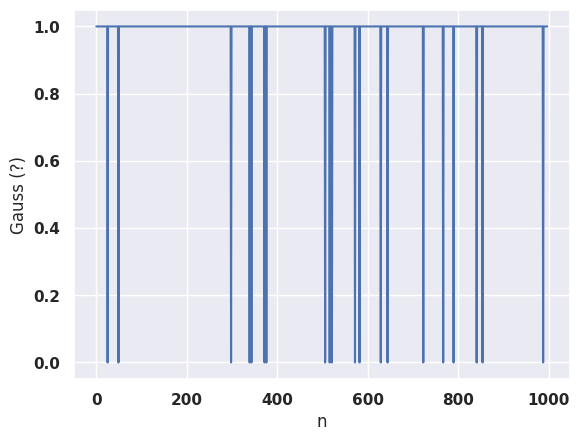

In [46]:
valid=[]
for n in range(1,len(z)-1):
    valid.append(confirm_gauss(central(z,n)))
plt.plot(valid)
plt.xlabel('n')
plt.ylabel('Gauss (?)')

Criterio Gaussiano 0
Criterio Gaussiano 1


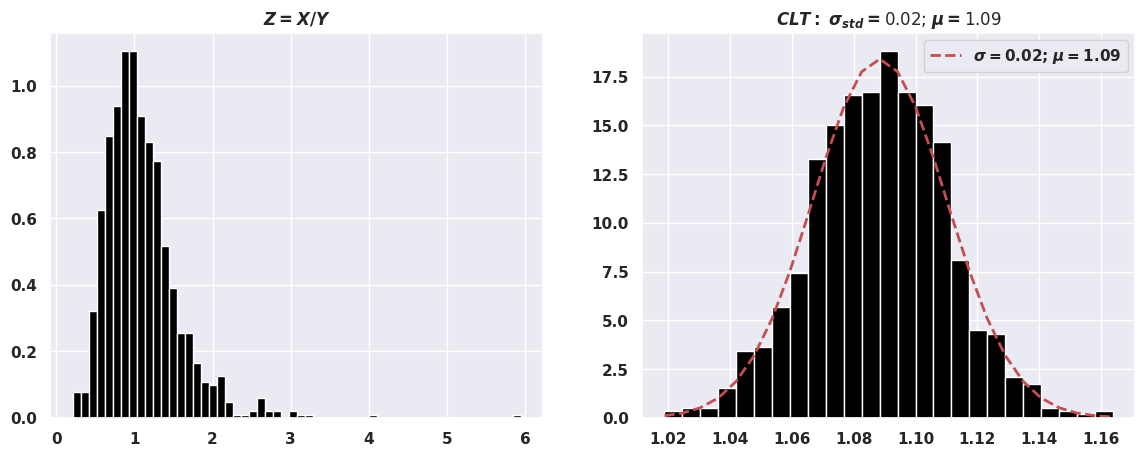

In [97]:
f=plt.figure(figsize=(14,5))

plt.subplot(121)
n, bins, patches=plt.hist(z,bins='fd',density=True,color='black')
plt.title('$Z=X/Y$')
print('Criterio Gaussiano',confirm_gauss(z))


plt.subplot(122)
n=500
clt=central(z,n)
desv=np.std(z,ddof=1)
standard=desv/np.sqrt(n)
plt.title('$CLT: $ $\sigma_{std}= $'+str(round(standard,2))+'; $\mu=$'+str(round(np.mean(z),2)))
n, bins, patches=plt.hist(clt,bins='fd',density=True,color='black')
(mu, sigma) = norm.fit(clt)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y,'r--',label='$\sigma= $'+str(round(sigma,2))+'; $\mu=$'+str(round(mu,2)), linewidth=2)
plt.legend()
print('Criterio Gaussiano',confirm_gauss(clt))
